Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 9 in Python

- __Please put your names and student IDs here___:
    - _Lorenz Rückert_, _01/911915_
    - _Lennart Kasserra_, _01/1358216_

---

#### Exercise 1:  K-means 

Perform k-means clustering with k=3 using the Euclidean distance by hand. Assume that initial clusters centroids are:

* Cluster 1: Record # 1
* Cluster 2: Record # 5
* Cluster 3: Record # 10

Compute for every iteration the updated cluster prototypes and state to which cluster each point is assigned after each iteration. 

_Note: In this exercise, you don’t need to normalize the data._

|ID|X1|X2|X3|X4|X5|
|-----|--------|-----------|-----------------|--------------|----|
|1|0.58|0.26|0.38|0.73|0.65|
|2|0.50|0.21|0.34|0.61|0.61|
|3|0.92|0.80|0.70|0.60|0.61|
|4|0.51|0.29|0.37|0.54|0.69|
|5|0.18|0.23|0.92|0.25|0.26|
|6|0.12|0.23|0.18|0.30|0.25|
|7|0.90|0.85|0.75|0.60|0.63|
|8|0.01|0.16|0.15|0.28|0.31|
|9|0.44|0.25|0.35|0.59|0.64|
|10|0.91|0.83|0.81|0.55|0.46|

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. You can use this to include a hand written calculation. Do not forget to also upload the image in your final submission.)_

```
> Your Answer
```
![](k_means_1.png)
![](k_means_2.png)

---

#### Exercise 3: Expectation Maximization (EM) Algorithm 

The sklearn class `GaussianMixture`can be used to compute the EM algorithm. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

##### __(a) Cluster the `em-data.csv` data. Describe each step and reason your parameter choices.__

In [2]:
em_data = pd.read_csv('em-data.csv') # load the data

data = em_data.values # convert to a numpy array

gmm = GaussianMixture(n_components=4, random_state=0)  # create a gmm model and define number of clusters based on visual inspection below

gmm.fit(data) # fit the model to the data

labels = gmm.predict(data) 

##### __(b) Visualize your results in a 2D plot.__

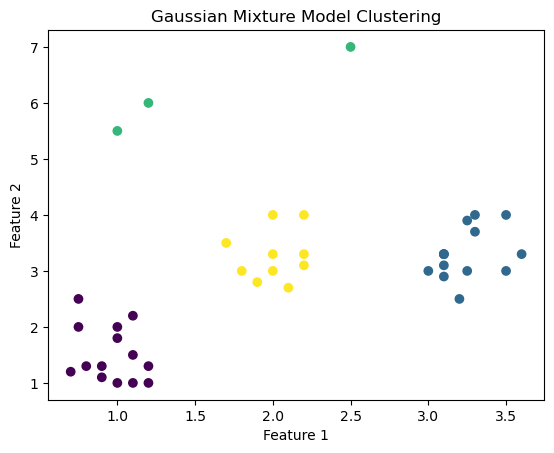

In [3]:
# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

#### Exercise 2: Partitioning Around Medoids (PAM) 

Load the `USArrests.csv` dataset and the following methods which can be used to compute PAM. Please install the `pyclustering` package. 

_(Hint: Use only the following imports)_

In [1]:
#!pip install pyclustering
import pandas as pd 
import numpy as np 
from pyclustering.cluster.kmedoids import kmedoids
from scipy.spatial.distance import pdist, cdist, squareform
import matplotlib.pyplot as plt
from random import randrange

In [4]:
# Load dataset here
arrests = pd.read_csv("USArrests.csv")
arrests.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


##### __(a) Standardize the columns of the "USArrests" dataset. Explain why we have to standardize the dataset?__

In [6]:
numeric = ["Murder", "Assault", "UrbanPop", "Rape"]
# Using min-max normalization:
arrests[numeric] = (arrests[numeric] - arrests[numeric].min()) / (arrests[numeric].max() - arrests[numeric].min())
arrests.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465


```
> Your Answer
```

*If we did not standardize, we would put more weight on variables with lower variance (or a smaller range of values), as kmedoids considers absolute distances between observations.*

##### __(b) Compute the PAM (`kmedoids`) using `k = 4`. List the cluster and cluster medoids. Describe and explain the results.__

<Axes: xlabel='State', ylabel='State'>

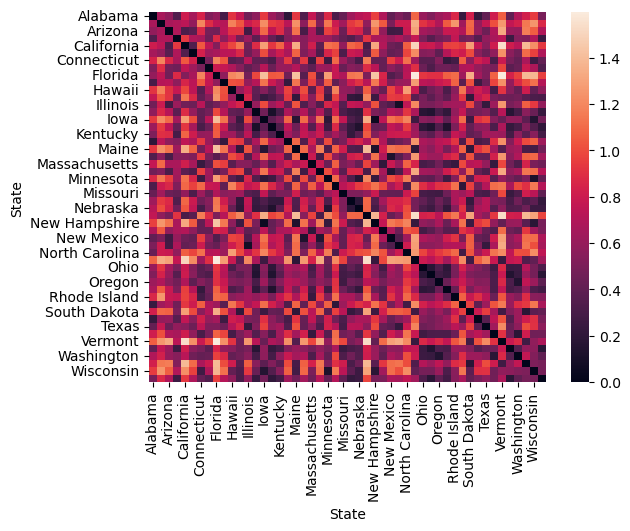

In [45]:
# First, we need a pairwise distance matrix (for the `kmedoids`-implementation to work):
pairwise = squareform(pdist(arrests[numeric]))

import seaborn as sns
sns.heatmap(pd.DataFrame(pairwise, columns=arrests["State"], index=arrests["State"]))

In [75]:
pam = kmedoids(pairwise, initial_index_medoids=[randrange(1,50) for _ in range(4)])
pam.process()
clusters = pam.get_clusters()
medoids = pam.get_medoids()

[print(f"Cluster: {cluster}\nMedoid: {medoid}\n\n") for cluster, medoid in zip(clusters, medoids)]

Cluster: [2, 4, 5, 8, 12, 19, 21, 27, 30, 31, 42]
Medoid: 21


Cluster: [3, 6, 7, 10, 13, 15, 16, 20, 24, 25, 26, 29, 34, 35, 36, 37, 38, 43, 45, 46, 49]
Medoid: 34


Cluster: [11, 14, 18, 22, 28, 33, 40, 44, 47, 48]
Medoid: 18


Cluster: [0, 1, 9, 17, 23, 32, 39, 41]
Medoid: 39




[None, None, None, None]

```
> Your Answer
```

*`kmedoids()` has generated four ($k$) clusters. It seems one of the clusters (here: the second) is significantly larger, i.e. holds more observations, than the other three.*

##### __(c) Define a Python method to compute the measure for the compactness of a PAM clustering. The parameters of the method is the data and the instance of the kmedoids class (`kmedoids_instance`).__

$$TD=\sum\limits^k_{i = 1} TD(C_i) \text{ and } TD(C) = \sum\limits_{p \in C} dist(p, m_c)$$

The medoid $m_c$ is the representative element of the cluster. 

_(Hint: Use the `pdist` or `cdist` method to compute the pairwise distance between $p$ and $m_c$)_

In [105]:
def compactness(data: pd.DataFrame, instance: kmedoids) -> float:
    instance.process()
    points = instance.get_clusters()
    medoids = instance.get_medoids()

    compact = 0
    for cluster, med in zip(points, medoids):
        obs = data.iloc[cluster]
        dist_mat = squareform(pdist(obs))
        med_index = cluster.index(med)
        compact_i = sum(dist_mat[med_index])
        compact += compact_i
    return compact

In [106]:
compactness(arrests[numeric], pam)

13.95426081541926

##### __(d) Use the newly defined function to compute TD of PAM $k = 3$.__

In [107]:
compactness(arrests[numeric], kmedoids(pairwise, initial_index_medoids=[randrange(1,50) for _ in range(3)]))

15.820712256660393

##### __(e) Compute the TD's for PAM with $k = 1, \dots, 10$ and plot the results. Explain the results of the plot.__

In [111]:
different_k = []
for k in [*range(1,11)]:
    compact = compactness(arrests[numeric], kmedoids(pairwise, initial_index_medoids=[randrange(1,50) for _ in range(k)]))
    different_k.append({"k": k, "compactness": compact})

different_k

[{'k': 1, 'compactness': 27.421254827316673},
 {'k': 2, 'compactness': 17.439106183418183},
 {'k': 3, 'compactness': 15.820712256660393},
 {'k': 4, 'compactness': 13.95426081541926},
 {'k': 5, 'compactness': 12.476942536411572},
 {'k': 6, 'compactness': 12.323656911946646},
 {'k': 7, 'compactness': 11.794589013755806},
 {'k': 8, 'compactness': 11.202548160813187},
 {'k': 9, 'compactness': 10.785022364752281},
 {'k': 10, 'compactness': 10.16369494737025}]

<Axes: xlabel='k', ylabel='compactness'>

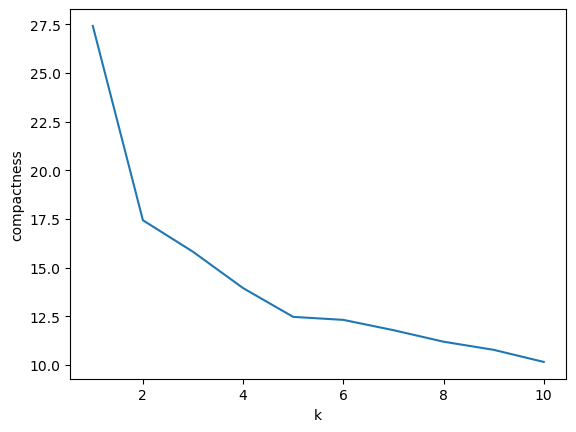

In [113]:
sns.lineplot(data=pd.DataFrame(different_k), x="k", y="compactness")

```
> Your Answer
```

*As $k$ increases, the compactness (total distance between points and the medoid of the cluster they were assigned to) decreases, meaning the clusters become more compact.*

---